Our main research question:
- What are the differences between trends of data breach events and the reporting rates of these events from popular traditional media articles?

Our hypotheses:
- Many breaches have very few (<2) articles written about them, despite totalling to more records breached overall
- Some industries (hypothesized: tech, finance) will be disproportionately overreported, while other industries (hypothesized: retail, service) will be disproportionately underreported
- The number of articles written about a breach will correlate more strongly with the number of records breached compared to sector, company size, and sensitivity

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import missingno as msno
from matplotlib import pyplot as plt

# Load data
data = pd.read_csv(
    "../../data/article_company_breach/joined_articles_company_breaches_no_duplicates.csv",
    encoding="ISO-8859-1",
    low_memory=False,
)

In [75]:
# Count the number of articles and TOTAL records lost per breach
# breach_summary = data.groupby('organisation').agg({
#     'records lost': 'sum',
#     'Publication': 'count'
# }).rename(columns={'Publication': 'article_count'})

# # Calculate the proportion of records breached to articles published
# breach_summary['records_per_article'] = breach_summary['records lost'] / breach_summary['article_count']

publication_summary = data.groupby('Publication').agg({
    'records lost': 'sum',  # Total records lost
    'Headline': 'count',  # Count unique headlines

    'sector': 'first',  # Sector of the breach
    'data sensitivity': 'first',  # Sensitivity level
}).rename(columns={'Headline': 'article_count'})  # Rename to make it intuitive

publication_summary = publication_summary.reset_index()


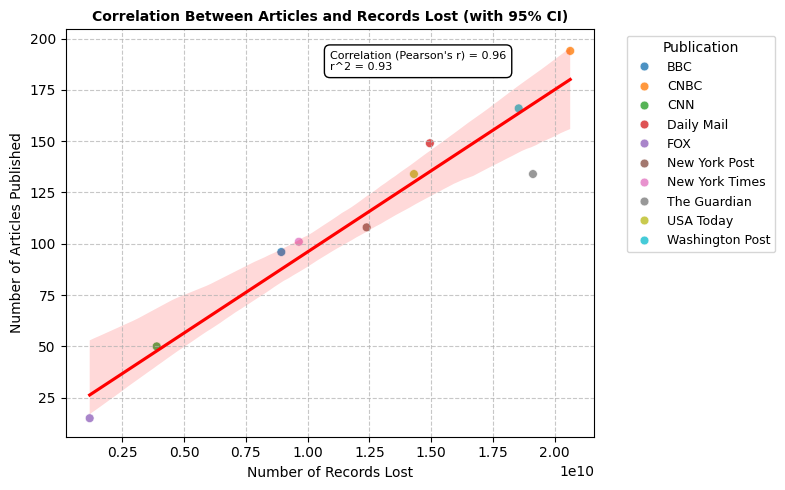

In [ ]:
# # Plot correlation between TOTAL articles published vs. TOTAL records lost
# plt.figure(figsize=(8, 5))
# ax = sns.regplot(
#     y='article_count',
#     x='records lost',
#     data=breach_summary,
#     scatter_kws={'alpha': 1, 's': 20},
#     line_kws={'color': 'red'},
#     ci=95,
#     color='black'
# )
# plt.title('Correlation Between Articles and Records Lost (with 95% CI)', fontsize=10, fontweight='bold')
# plt.ylabel('Number of Articles Published', fontsize=10)
# plt.xlabel('Number of Records Lost', fontsize=10)
# plt.grid(axis='both', linestyle='--', alpha=0.7)

# plt.legend(title='Publication', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=9)

# # Annotate outliers
# outliers = breach_summary[breach_summary['records lost'] > breach_summary['records lost'].quantile(0.95)]
# for i, point in outliers.iterrows():
#     ax.annotate(
#         i,
#         (point['article_count'], point['records lost']),
#         textcoords="offset points",
#         xytext=(5, 5),
#         ha='center',
#         fontsize=8,
#         color='blue'
#     )

# plt.tight_layout()
# plt.show()

# plt.close()

import scipy.stats as stats

# Plot correlation between TOTAL articles published vs. TOTAL records lost
plt.figure(figsize=(8, 5))

# Use scatterplot for color-encoding groupby column
scatter = sns.scatterplot(
    data=publication_summary,
    
    y='article_count',
    x='records lost',
    
    hue='Publication',  # Color encoding

    palette='tab10',
    alpha=0.8,
    s=40
)

# Add the regression line using regplot (no scatter points)
reg = sns.regplot(
    y='article_count',
    x='records lost',
    data=publication_summary,
    scatter=False,  # Don't plot scatter points since they're already plotted
    line_kws={'color': 'red'},
    ci=95
)

# Customize the plot
plt.title('Correlation Between Articles and Records Lost (with 95% CI)', fontsize=10, fontweight='bold')
plt.ylabel('Number of Articles Published', fontsize=10)
plt.xlabel('Number of Records Lost', fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Add custom legend for 'Publication'
handles, labels = scatter.get_legend_handles_labels()  # Get legend handles and labels
plt.legend(handles, labels, title='Publication', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=9)


# Calculate correlation coefficient (Pearson's r)
correlation, _ = stats.pearsonr(publication_summary['records lost'], publication_summary['article_count'])

# Get the regression line parameters (slope and intercept)
slope, intercept, rvalue, pvalue, stderr = stats.linregress(publication_summary['records lost'], publication_summary['article_count'])

# Annotate the plot with correlation coefficient and regression parameters
plt.annotate(f'Correlation (Pearson\'s r) = {correlation:.2f}\nr^2 = {rvalue**2:.2f}', 
             xy=(0.5, 0.9),
             xycoords='axes fraction',
             fontsize=8, 
             color='black', 
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()

plt.close()



Scatter Plot:

- Each point on the plot represents a publication, with the x-axis showing the number of records lost and the y-axis showing the number of articles published about a breach event.
- The points are color-coded by Publication, which means each color corresponds to a specific publication. This allows you to see if different publications cover breaches differently, depending on the total number of records lost.

Regression Line:

- The red regression line represents the overall trend between the total number of records lost and the total number of articles published, computed for the entire dataset.
- The slope of the regression line tells you whether there is a positive or negative relationship between the two variables (i.e., do breaches with more records lost tend to get more articles written about them?).

Confidence Interval (CI):

- The shaded area around the regression line is the 95% confidence interval (CI), which reflects the uncertainty in the estimated regression line. This interval shows where we expect the true regression line to lie, given the data.
- A narrower CI indicates more confidence in the estimate, while a wider CI suggests more uncertainty.

Outliers:

- Outliers are annotated on the plot, and these are breaches with exceptionally high records lost compared to the overall distribution. These breaches are of particular interest because they represent events that might have attracted an unusual amount of media coverage (reflected in a higher article count).

---

General Trend:

- If the regression line slopes upward, it suggests that breaches with more records lost tend to have more articles written about them. This is a typical pattern, as larger breaches (with more records lost) are usually more significant or impactful, leading to higher media coverage.
- Conversely, if the line slopes downward, it indicates that more articles are written about breaches with fewer records lost, which would be an unusual finding.

Confidence Interval:

- The width of the CI is an important factor. If it is narrow, you can be more confident that the relationship between the number of records lost and the number of articles is strong. A wide CI suggests more variation in the data, meaning the relationship might not be as consistent across different breaches.

Publication-Based Insights:

- By color-coding by publication, you can assess whether some publications are more likely to cover breaches with larger or smaller records lost. If certain publications consistently have more articles for a given number of records lost, this could indicate a difference in how these outlets prioritize breaches.
- You may also see if some publications have a more scattered or less concentrated grouping, which could suggest inconsistent coverage based on breach size.

Outliers:

- The outliers could be breaches with extremely high records lost and unusually high article counts. These outliers may represent very high-profile breaches that received disproportionate media coverage. Annotating these outliers helps highlight cases where the correlation might break down, showing that extreme events might skew the data.

---

The scatter plot, augmented with a red regression line and a 95% confidence interval, reveals a generally positive relationship between the number of records lost and the number of articles published about a breach. As expected, larger breaches (with more records lost) tend to receive more media coverage, with the regression line showing a clear upward slope. However, the 95% confidence interval indicates some uncertainty, particularly for breaches with very low or very high numbers of records lost, where article counts vary widely across publications.

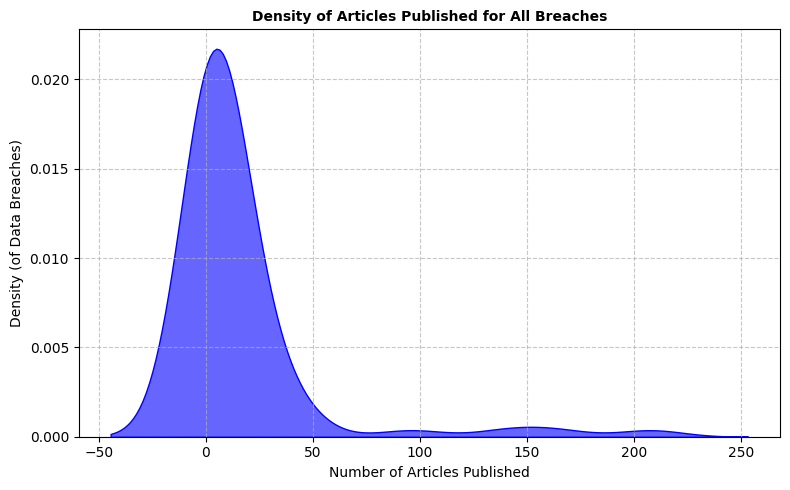

In [ ]:

breach_summary = data.groupby('ID').agg({
    'records lost': 'sum',  # Total records lost
    'Headline': 'count',  # Count unique headlines

    'sector': 'first',  # Sector of the breach
    'data sensitivity': 'first',  # Sensitivity level
}).rename(columns={'Headline': 'article_count'})

breach_summary = breach_summary.reset_index()

# Plot density of articles published for all breaches
plt.figure(figsize=(8, 5))

# Use kdeplot for density
sns.kdeplot(
    data=breach_summary,
    x='article_count',
    fill=True,
    color='blue',
    alpha=0.6
)

# Customize plot
plt.title('Density of Articles Published for All Breaches', fontsize=10, fontweight='bold')
plt.xlabel('Number of Articles Published', fontsize=10)
plt.ylabel('Density (of Data Breaches)', fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

plt.close()

What the Grouping Represents:

- By grouping by ID (the unique breach event identifier), each point in the summary dataset corresponds to a single breach event, which may have been reported multiple times (as indicated by the article_count).
    The article_count now represents the total number of unique articles written about each breach event.

Shape of the Distribution:

- The peak of the curve will represent the most common article count for individual breach events. A peak at a low value (e.g., close to 1 or 2) would indicate that most breach events are covered in just a few articles.
- If the curve is right-skewed (longer tail on the right), it suggests that while most breach events are covered by a small number of articles, a few breach events are covered extensively in the media.
- A narrower curve would suggest that the number of articles is fairly consistent across breach events, while a wider curve means that article counts are spread over a larger range of values.

Spread of the Distribution:

- The spread indicates the range of coverage for breaches. A wider curve means that some breach events have only one article, while others might have dozens or more.
    If the plot shows a concentrated area near the low end, it suggests that the majority of breaches receive minimal media coverage, which supports the hypothesis that breaches involving fewer articles are the norm.

Skewness:

- Positively skewed distribution (tail extending to the right) would suggest that while most breaches have low article counts, there are outliers with significantly higher article counts, reflecting rare cases where breaches received more extensive media attention.

---

The density plot of articles published per breach event reveals a distribution with a clear peak at 1-2 articles. This suggests that the majority of breaches are reported on in just a small number of articles, aligning with the hypothesis that many breaches have limited media coverage. The distribution is positively skewed, indicating that while most breaches receive minimal attention, a small number are extensively covered, likely due to their size or the sensitivity of the data involved. The long tail of the curve suggests these outlier breach events are disproportionately covered, reinforcing the idea that breaches with larger impacts tend to attract more media focus. This finding highlights the discrepancy in coverage, with many breaches remaining underreported despite their significant consequences.

NOT SURE ABOUT THESE YET:

/tmp/ipykernel_20492/2285985595.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


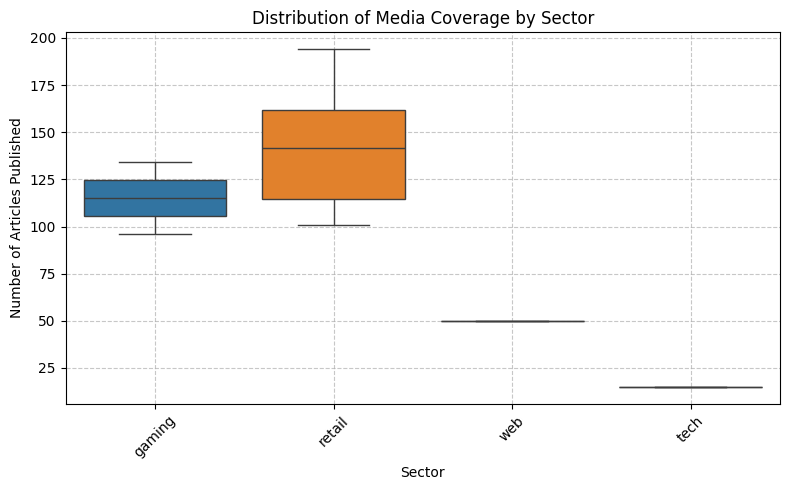

In [ ]:

summary = data.groupby('Publication').agg({
    'records lost': 'sum',  # Total records lost
    'Headline': 'count',  # Count unique headlines
    
    'sector': 'first',  # Sector of the breach
    'data sensitivity': 'first',  # Sensitivity level
}).rename(columns={'Headline': 'article_count'})

summary = summary.reset_index()

plt.figure(figsize=(8, 5))

sns.boxplot(
    x='sector', 
    y='article_count', 
    data=summary, 
    palette='tab10'
)

plt.title('Distribution of Media Coverage by Sector', fontsize=12)
plt.xlabel('Sector', fontsize=10)
plt.ylabel('Number of Articles Published', fontsize=10)

plt.xticks(rotation=45)
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

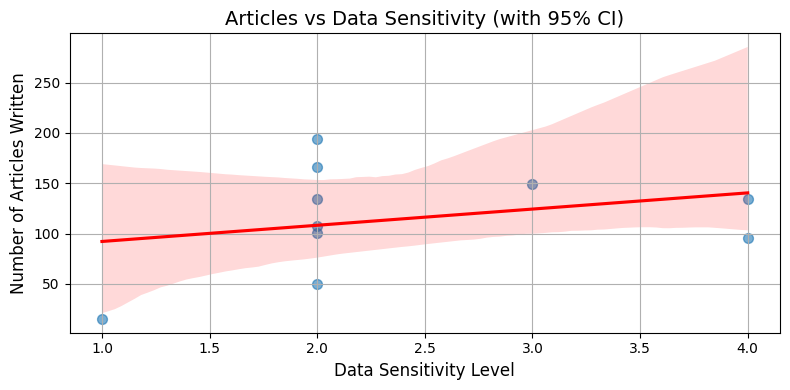

In [187]:
# Group data to create article_count, and aggregate necessary variables
summary = data.groupby('Publication').agg({
    'records lost': 'sum',  # Total records lost
    'Headline': 'count',  # Count of headlines/articles

    'total employee estimate': 'first',  # Assume company_size is consistent for a sector
    'data sensitivity': 'first',  # Assuming sensitivity level is consistent within a sector
}).reset_index().rename(columns={'Headline': 'article_count'})  # Rename for clarity

# 2. Create regplot for Articles vs Data Sensitivity
plt.figure(figsize=(8, 4))
sns.regplot(
    x='data sensitivity',  # Data sensitivity level
    y='article_count',  # Number of articles
    data=summary,
    scatter_kws={'s': 50, 'alpha': 0.6},  # Adjust scatter point size and transparency
    line_kws={'color': 'red'},  # Regression line color
    ci=95  # 95% Confidence interval
)
plt.title('Articles vs Data Sensitivity (with 95% CI)', fontsize=14)
plt.xlabel('Data Sensitivity Level', fontsize=12)
plt.ylabel('Number of Articles Written', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()